In [2]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv("cleaned_autos.csv")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
pd.set_option('display.max_columns', None) ## tum colums lari gormemizi saglar.
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4


In [5]:
### df.groupby('vehicleType').price.mean()    boyle pandas ile yapabiliriz.

In [6]:
df.shape

(313687, 27)

In [7]:
df.vehicleType.unique()
#### tek bir numeric deger icin boxplot, histogram ve dist cizeriz.

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

### Variation of the price range by the vehicle type

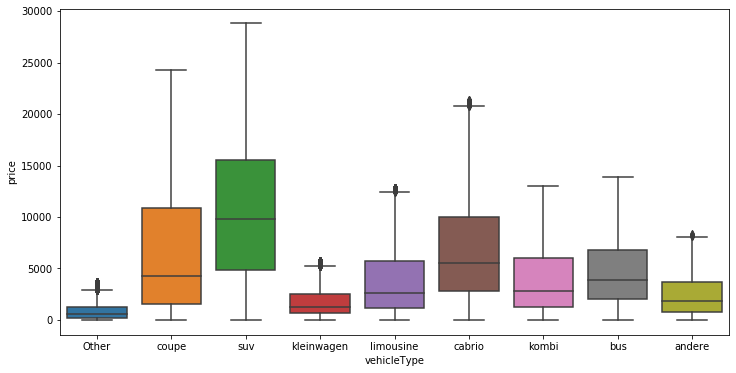

In [8]:
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x = 'vehicleType', y = 'price', data=df)
plt.show()
#ax.set_xticklabels(df.vehicleType.unique(), rotation = 90)

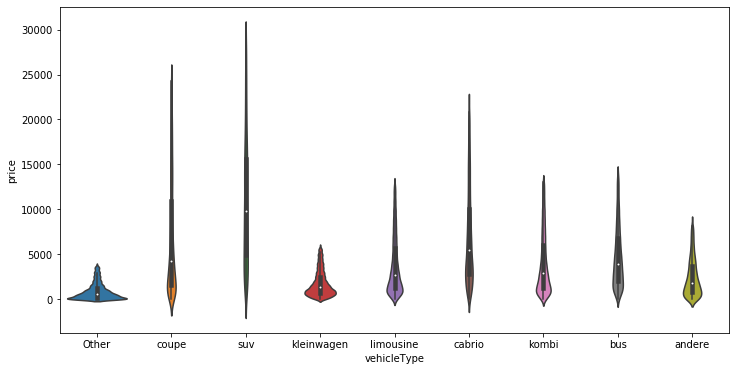

In [9]:
fig, ax = plt.subplots(figsize = (12,6))
sns.violinplot(x = 'vehicleType', y = 'price', data=df)
plt.show()

### Demonstration of the mean pricec by the vehicle type

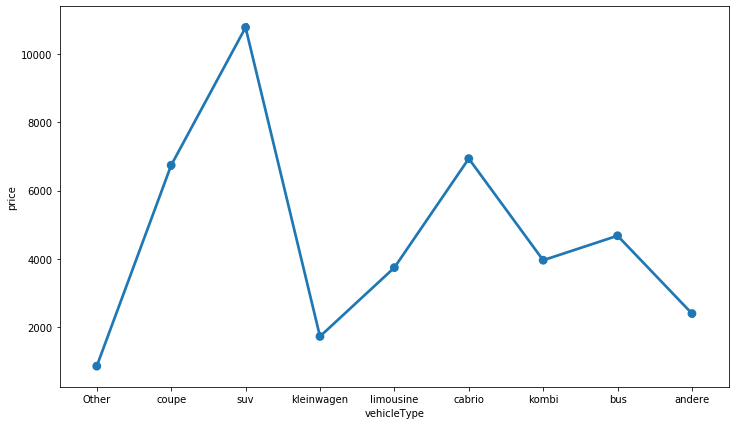

In [10]:
plt.figure(figsize=(12,7))
sns.pointplot(df.vehicleType, df.price);

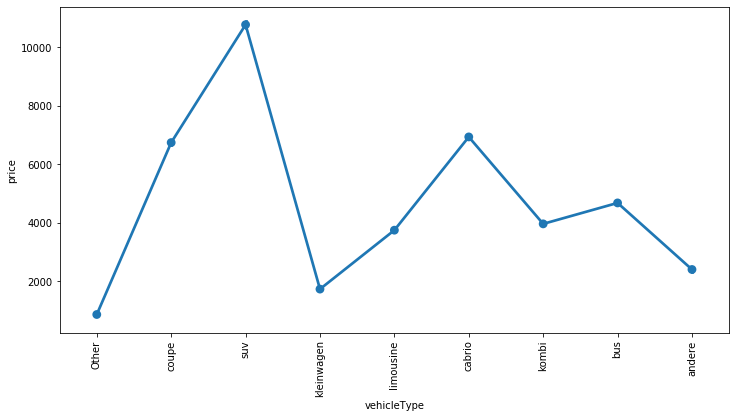

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", data=df)
ax.set_xticklabels(df.vehicleType.unique(), rotation=90);

## Total count of vehicles by type available on ebay for sale

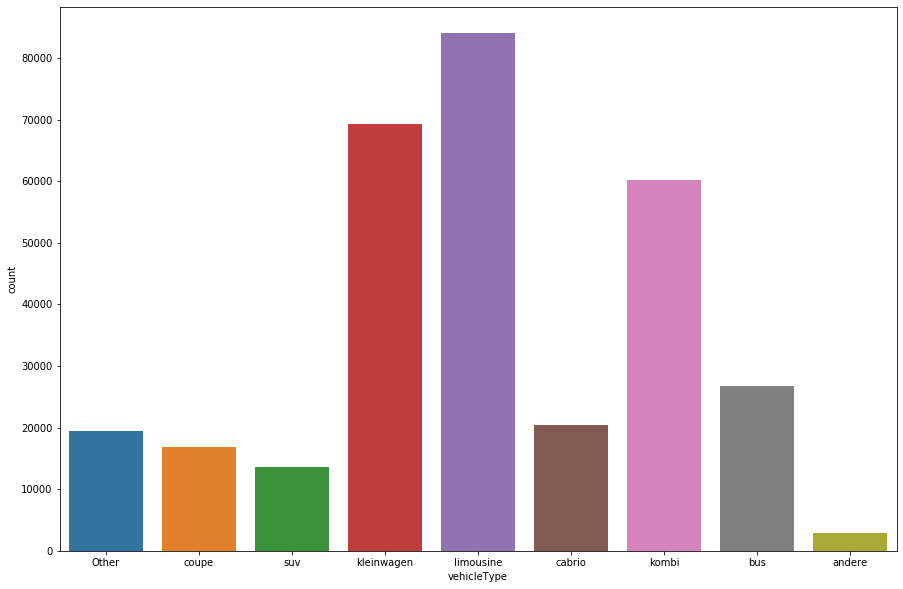

In [12]:
fig, ax = plt.subplots( figsize=(15, 10))
sns.countplot(x = 'vehicleType',data=df)

##sns.countplot(df.vehicleType)


In [27]:
order = df.groupby("vehicleType").price.mean().sort_values(ascending=False).index
order

Index(['suv', 'cabrio', 'coupe', 'bus', 'kombi', 'limousine', 'andere',
       'kleinwagen', 'Other'],
      dtype='object', name='vehicleType')

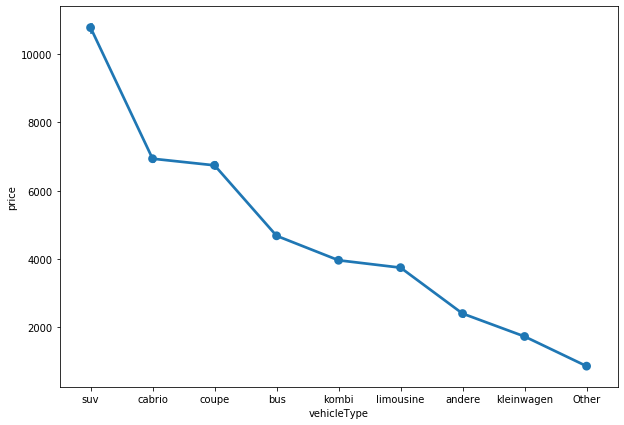

In [28]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.pointplot(x = 'vehicleType',y = "price", order = order, data = df)

In [29]:
order = df.groupby("vehicleType").price.mean().sort_values().index
order

Index(['Other', 'kleinwagen', 'andere', 'limousine', 'kombi', 'bus', 'coupe',
       'cabrio', 'suv'],
      dtype='object', name='vehicleType')

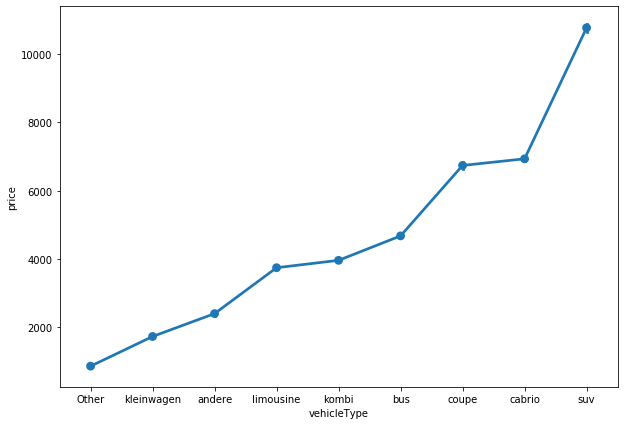

In [30]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.pointplot(x = 'vehicleType',y = "price", order = order, data = df)

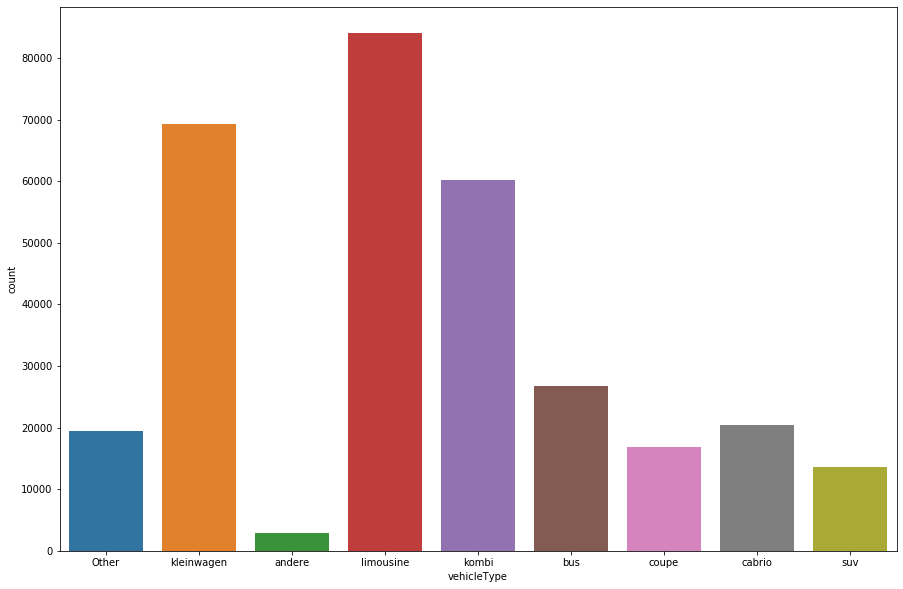

In [17]:
fig, ax = plt.subplots( figsize=(15, 10))
sns.countplot(x = 'vehicleType',order = order, data = df)

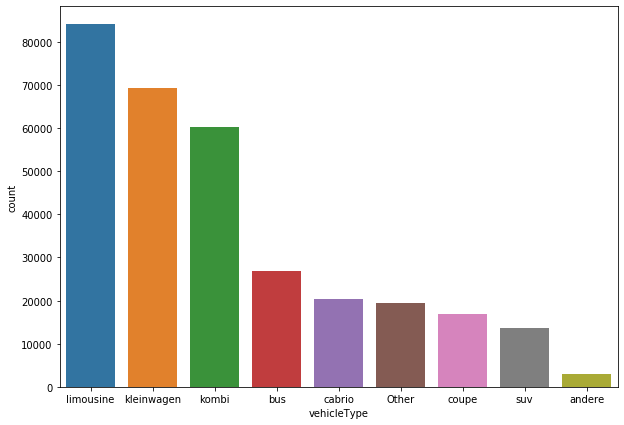

In [25]:
fig, ax = plt.subplots( figsize=(10, 7))
sns.countplot(x = 'vehicleType',order=df.vehicleType.value_counts().index, data = df)


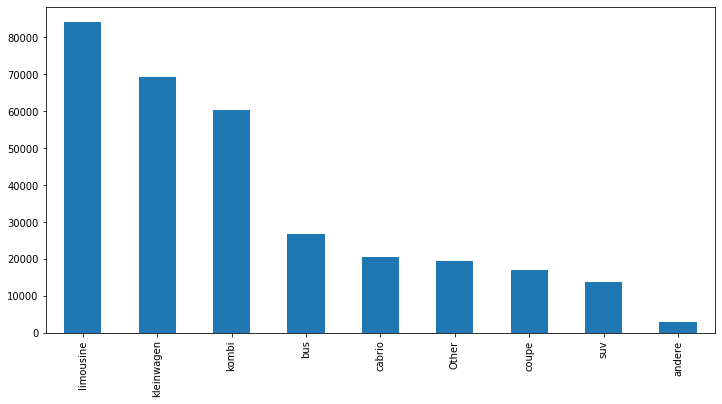

In [24]:
#PANDAS
df.vehicleType.value_counts().plot.bar(figsize = (12,6))


In [ ]:
plt.subplot(2,1,1)
plt.plot(age, salary)
plt.plot(2,1,1)
plt.plot(age, salary_2)
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.title('title');

In [ ]:
# No of Vehicles by Brand Available on ebay for sale ---->>>sns.countplot(df.vehicleType)

## Average price for vehicles based on the type of vehicle as well as on the type of gearbox

## Average price of vehicle by fuel type as well as on the type of gearbox

## Average price of vehicles by vehicle type and brand (heatmap) (first: groupby method, then: pivot table, finally heatmap)

## Avg price of car by most common 15 years (or in last 15 years)

In [32]:
x =df.vehicleType.value_counts()

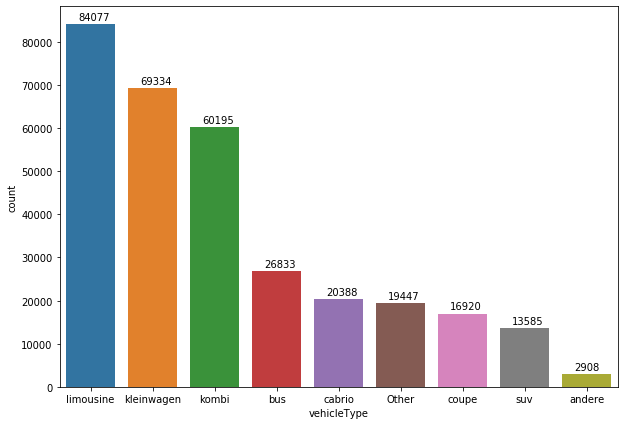

In [37]:
fig, ax = plt.subplots( figsize=(10, 7))
g = sns.countplot(x = 'vehicleType',order=df.vehicleType.value_counts().index, data = df)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+1000))

In [33]:
x.index

Index(['limousine', 'kleinwagen', 'kombi', 'bus', 'cabrio', 'Other', 'coupe',
       'suv', 'andere'],
      dtype='object')

In [34]:
x.values

array([84077, 69334, 60195, 26833, 20388, 19447, 16920, 13585,  2908],
      dtype=int64)

<BarContainer object of 9 artists>

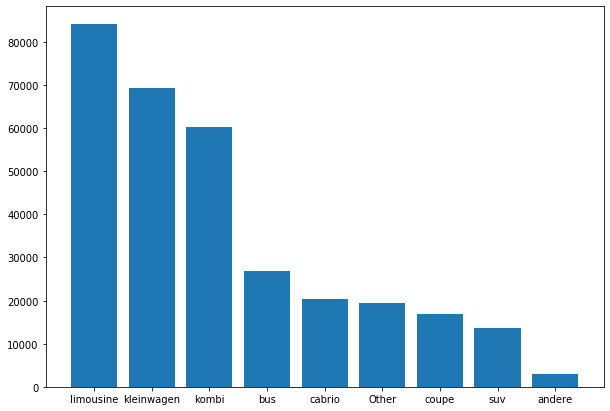

In [35]:
fig, ax =plt.subplots(figsize=(10,7))

ax.bar(x.index, x.values)

In [ ]:
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+1000))